In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [2]:
df_inputs = pd.read_csv('Scalled_Data')
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19648 non-null  float64
 1   latitude            19648 non-null  float64
 2   housing_median_age  19648 non-null  float64
 3   total_rooms         19648 non-null  float64
 4   total_bedrooms      19648 non-null  float64
 5   population          19648 non-null  float64
 6   households          19648 non-null  float64
 7   median_income       19648 non-null  float64
 8   <1H OCEAN           19648 non-null  float64
 9   INLAND              19648 non-null  float64
 10  ISLAND              19648 non-null  float64
 11  NEAR BAY            19648 non-null  float64
dtypes: float64(12)
memory usage: 1.8 MB


In [3]:
df_target = pd.read_csv("Labels")
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  19648 non-null  float64
dtypes: float64(1)
memory usage: 153.6 KB


In [4]:
X_train,X_test,y_train,y_test = train_test_split(df_inputs,df_target,test_size=0.3)

In [5]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.score(X_test,y_test)

0.6149328785522454

In [6]:
result = model.predict(X_test)
result

array([[322032.13200217],
       [ 54651.68369459],
       [152251.39939072],
       ...,
       [176738.63655078],
       [ 93206.21915842],
       [160792.44925616]])

In [7]:
y_test

,median_house_value
19290,476900.0
14165,69600.0
13043,287500.0
3876,293000.0
19641,98300.0
...,...
1602,108300.0
17893,170800.0
6055,236400.0
3930,89300.0


In [8]:
lin_rmse = mean_squared_error(result,y_test)
lin_rmse

3613782080.622104

In [9]:
model_tree = DecisionTreeRegressor(random_state=42,max_leaf_nodes=400)
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=400, random_state=42)

In [10]:
result_tree = model_tree.predict(X_test)
tree_rmse = mean_squared_error(result_tree,y_test)
tree_rmse

2798393927.630093

Text(0, 0.5, 'label')

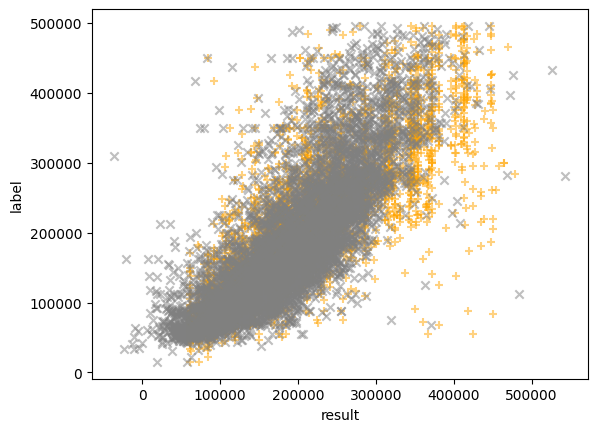

In [11]:
plt.scatter(result_tree,y_test,marker = '+',alpha=0.5,color='orange')
plt.scatter(result,y_test,marker='x',alpha = 0.5, color = 'gray')
plt.xlabel("result")
plt.ylabel("label")

In [12]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY
19290,0.190239,0.555792,1.000000,0.064474,0.086450,0.023711,0.086842,0.322678,0.0,0.0,0.0,1.0
14165,0.278884,0.642933,0.686275,0.011013,0.014434,0.007904,0.014474,0.050296,0.0,1.0,0.0,0.0
13043,0.601594,0.163656,0.588235,0.057811,0.127425,0.061269,0.118092,0.086502,1.0,0.0,0.0,0.0
3876,0.596614,0.141339,0.352941,0.063838,0.088934,0.035651,0.089145,0.306037,1.0,0.0,0.0,0.0
19641,0.280876,0.706695,0.509804,0.052851,0.063635,0.030242,0.062500,0.141350,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1602,0.248008,0.434644,0.705882,0.008546,0.016607,0.006390,0.016118,0.140095,1.0,0.0,0.0,0.0
17893,0.641434,0.137088,0.607843,0.047129,0.081484,0.071891,0.082566,0.141446,1.0,0.0,0.0,0.0
6055,0.647410,0.132837,0.764706,0.031767,0.051839,0.020348,0.056086,0.135784,1.0,0.0,0.0,0.0
3930,0.709163,0.132837,0.313725,0.084338,0.117492,0.056420,0.110362,0.123929,0.0,1.0,0.0,0.0


In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


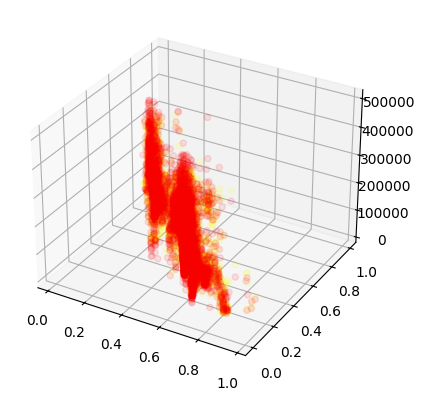

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['longitude'], X_test['latitude'], y_test, c='red', marker='o',alpha=0.1)
ax.scatter(X_test['longitude'], X_test['latitude'], result_tree, c='yellow', marker='o',alpha=0.1)
# ax.scatter(X_test['longitude'], X_test['latitude'], result, c='orange', marker='o',alpha=0.1)
plt.show()


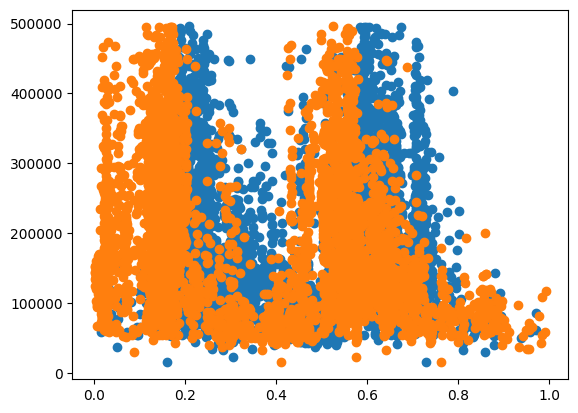

In [15]:
plt.scatter(X_test['longitude'], y_test)
plt.scatter(X_test['latitude'],y_test)

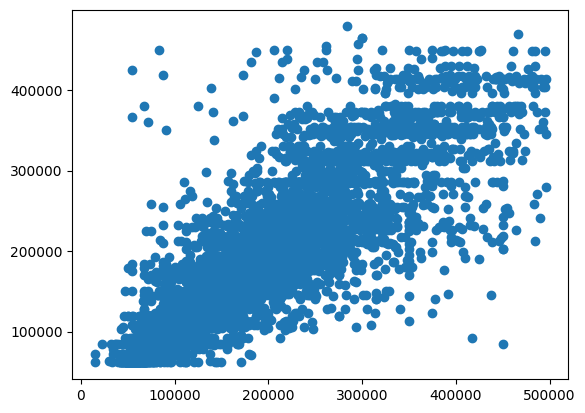

In [16]:
plt.scatter(y_test,result_tree)

In [22]:
model_random_forest = RandomForestRegressor(n_estimators=100)
model_random_forest.fit(X_train,y_train)

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [18]:
model_random_forest.score(X_test,y_test)
results_random = model_random_forest.predict(X_test)
random_error = mean_squared_error(results_random,y_test)
random_error

1930661105.6991525

In [19]:
model_random_forest.score(X_test,y_test)

0.7942781003732435

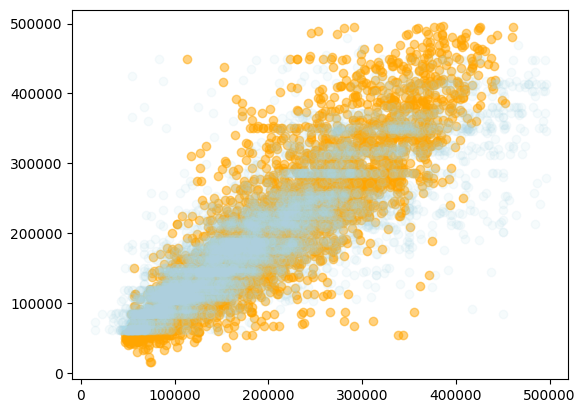

In [20]:
plt.scatter(results_random,y_test,color='orange',alpha=0.5)
plt.scatter(y_test,result_tree,color='lightblue',alpha=0.1)

In [21]:
from sklearn.model_selection import cross_val_score